In [2]:
#load csv
import csv
import os
import sys
import re
import json
import pandas as pd
import numpy as np

#read csv file with path:
csv_filepath = r"C:\Users\samut\OneDrive\Desktop\DATATHON 2024\skylab_instagram_datathon_dataset.csv"
df_real = pd.read_csv(csv_filepath, sep=';')
#make the period_end_date column a datetime object
df_real['period_end_date'] = pd.to_datetime(df_real['period_end_date'])
#drop calculation_type column
df_real.drop(columns=['calculation_type'], inplace=True)
#drop period column
df_real.drop(columns=['period'], inplace=True)
#drop all values named All Brand from business entity doing_business as name
df_real = df_real[df_real['business_entity_doing_business_as_name'] != 'All Brands']


 
grouping_columns = [col for col in df_real.columns if col != 'compset']

df_real.fillna('Group_Null', inplace=True)
df_real = df_real.groupby(grouping_columns).agg({'compset': lambda x: set(x)}).reset_index()
df_real.replace('Group_Null', pd.NA, inplace=True)

df_real['domicile_country_name'] = df_real['domicile_country_name'].replace('china;hong kong', 'hong kong')

# remove the sign ";" in column domicile_country_name
df_real['domicile_country_name'] = df_real['domicile_country_name'].str.replace(';', '')

# if empty, fill with nan
df_real['domicile_country_name'] = df_real['domicile_country_name'].replace('', np.nan)

df_real




C:\Users\samut\AppData\Local\Temp\ipykernel_38008\2892129317.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Group_Null' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_real.fillna('Group_Null', inplace=True)


,period_end_date,compset_group,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,followers,pictures,videos,comments,likes,compset
0,2015-01-03,Apparel Retail,Abercrombie & Fitch,Abercrombie & Fitch,United States of America,Abercrombie & Fitch,New York Stock Exchange,1669930.0,5.0,1.0,908.0,43976.0,"{US Softlines Analyst Interest List, Omnichann..."
1,2015-01-03,Apparel Retail,Aerie,American Eagle,United States of America,American Eagle,New York Stock Exchange,<NA>,128.0,<NA>,4715.0,460095.0,"{US Softlines Analyst Interest List, Omnichann..."
2,2015-01-03,Apparel Retail,Aeropostale,Aeropostale,<NA>,ARO Liquidation Inc,<NA>,2318630.0,13.0,<NA>,7009.0,1328515.0,"{US Softlines Analyst Interest List, Ecommerce..."
3,2015-01-03,Apparel Retail,Aldo,Aldo Group Inc/The,<NA>,Aldo Group Inc/The,<NA>,<NA>,89.0,1.0,1919.0,88904.0,"{Omnichannel Apparel Retail, Apparel Retail}"
4,2015-01-03,Apparel Retail,Alexandre Birman,Arezzo Industria e Comercio SA,Brazil,Arezzo Industria e Comercio SA,Bolsa de Valores de Sao Paulo (XBSP),<NA>,3.0,<NA>,109.0,2549.0,"{Omnichannel Apparel Retail, Apparel Retail}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298035,2023-09-16,Toys & Collectibles,Miniso,MINISO Group Holding Ltd,Hong Kong,MINISO Group Holding Ltd,Hong Kong Exchange,8291470.0,894.0,466.0,20177.0,1117490.0,{Toys & Collectibles}
298036,2023-09-16,Toys & Collectibles,Pop Mart,Pop Mart International Group Ltd,Hong Kong,Pop Mart International Group Ltd,Hong Kong Exchange,423704.0,248.0,77.0,1941.0,171832.0,{Toys & Collectibles}
298037,2023-09-16,Toys & Collectibles,Rolife,"Robotime Technology (Suzhou) Co., Ltd.",<NA>,"Robotime Technology (Suzhou) Co., Ltd.",<NA>,121511.0,23.0,13.0,234.0,19833.0,{Toys & Collectibles}
298038,2023-09-16,Toys & Collectibles,Sanrio,Sanrio Co Ltd,Japan,Sanrio Co Ltd,Tokyo Stock Exchange,2492199.0,47.0,5.0,15341.0,1893434.0,{Toys & Collectibles}


In [169]:
# how meany unique companys are in each unique compset value
compset = df_real['compset'].unique()
compset_dict = {}
for comp in compset:
    compset_dict[comp] = df_real[df_real['compset'] == comp]['business_entity_doing_business_as_name'].nunique()
print(compset_dict)




{'Soft Luxury': 43, 'Luxury & Premium & Mainstream': 146, 'US Softlines Analyst Interest List': 253, 'Global Luxury Analysts Interest List': 66, 'Coffee': 5, 'Restaurants': 40, 'Beverages': 50, 'Sports drinks': 4, 'Energy drinks': 6, 'Fast Fashion': 44, 'Omnichannel Apparel Retail': 57, 'Apparel Retail': 164, 'US Department Store': 11, 'Latam Apparel Retail': 8, 'Food Products': 48, 'Snack Bars': 9, 'Pasta Sauce': 6, 'Ecommerce Apparel Retail': 47, 'Ecommerce Mainstream Apparel Retail': 22, 'Sporting Goods': 7, 'Casual Dining': 15, 'Hard Luxury': 34, 'Sportswear & Athleisure': 47, 'Athleisure': 16, 'Footwear': 25, 'Beauty & Boutique': 104, 'Building Products': 11, 'Sportswear': 28, 'Petcare': 11, 'Premium Brands': 27, 'QSR': 16, 'Alcohol': 35, 'Toys & Collectibles': 9, 'Mattress': 12, 'Fitness & Exercise': 21, 'US Discount Store': 11, 'Ecommerce Luxury Apparel Retail': 13, 'Plant-Based Meat': 19, 'Food Retail': 6, 'Discount Retailers ': 6, 'Mid-Range Watch & Jewelry': 20, 'Outdoor Gear

In [136]:
df_real_wo_all = df_real[df_real['business_entity_doing_business_as_name'] != 'All Brands']


In [137]:
grouped_df = df_real_wo_all.groupby('compset_group')
max_likes_companies = grouped_df.apply(lambda x: x.loc[x['likes'].idxmax()])
max_likes_companies

,period,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,calculation_type,followers,pictures,videos,comments,likes
compset_group,,,,,,,,,,,,,,,
Apparel Retail,Weekly,2016-12-17,Apparel Retail,US Softlines Analyst Interest List,Victoria's Secret,Victoria's Secret & Co,United States of America,Victoria's Secret & Co,New York Stock Exchange,Metric Value,57963765.0,314.0,86.0,253923.0,71526696.0
Beauty & Boutique,Weekly,2016-11-26,Beauty & Boutique,Beauty & Boutique,Kylie Cosmetics,Coty,United States of America,Agnaten SE,New York Stock Exchange,Metric Value,9935785.0,150.0,11.0,321178.0,36044217.0
Beverages,Weekly,2017-04-15,Beverages,Energy drinks,Red Bull,Red Bull,NaN,Red Bull,NaN,Metric Value,NaN,1401.0,603.0,89711.0,20223635.0
Building Products,Weekly,2022-10-01,Building Products,Building Products,GAF,Standard Industries Inc,NaN,G Holdings Inc,NaN,Metric Value,28603.0,9.0,8.0,668.0,120835.0
Dermatology and Orthodontics,Weekly,2019-05-18,Dermatology and Orthodontics,Dermatology and Orthodontics,Botox,Allergan,NaN,AbbVie,NaN,Metric Value,673386.0,21.0,15.0,0.0,698679.0
Discount Retailers,Weekly,2019-11-23,Discount Retailers,Discount Retailers,Target,Target,United States of America,Target,New York Stock Exchange,Metric Value,6420684.0,44.0,6.0,15422.0,960012.0
Entertainment,Weekly,2022-05-07,Entertainment,Entertainment,MARVEL,Aga Marvel,NaN,Aga Marvel,NaN,Metric Value,111344909.0,477.0,417.0,300988.0,120689724.0
Fitness & Exercise,Weekly,2022-01-01,Fitness & Exercise,Fitness & Exercise,Peloton,Peloton,United States of America,Peloton,NASDAQ Global Select,Metric Value,1760388.0,48.0,17.0,61990.0,1326231.0
Food Products,Weekly,2019-08-31,Food Products,Plant-Based Meat,Beyond Meat,Beyond Meat,United States of America,Beyond Meat,NASDAQ Global Select,Metric Value,777795.0,10.0,5.0,31307.0,440512.0


In [138]:
unique_companies = df_real_wo_all.groupby('compset_group')['business_entity_doing_business_as_name'].nunique()
print(unique_companies)
df_real_wo_all['compset_group'].value_counts()


compset_group
Apparel Retail                   163
Beauty & Boutique                103
Beverages                         49
Building Products                 10
Dermatology and Orthodontics      11
Discount Retailers                 5
Entertainment                      3
Fitness & Exercise                20
Food Products                     47
Food Retail                        5
Home Appliances                    7
Luxury & Premium & Mainstream    145
Mattress                          11
Outdoor Gear                      17
Petcare                           10
Restaurants                       39
Sporting Goods                     6
Sportswear & Athleisure           46
Toys & Collectibles                8
Name: business_entity_doing_business_as_name, dtype: int64


compset_group
Luxury & Premium & Mainstream    212146
Apparel Retail                   203658
Sportswear & Athleisure           54338
Beauty & Boutique                 43811
Food Products                     39882
Beverages                         39196
Restaurants                       35324
Outdoor Gear                       8626
Fitness & Exercise                 8523
Dermatology and Orthodontics       6454
Mattress                           4652
Petcare                            4441
Building Products                  3921
Sporting Goods                     2730
Home Appliances                    2558
Food Retail                        2119
Toys & Collectibles                1774
Discount Retailers                 1645
Entertainment                       760
Name: count, dtype: int64

In [139]:
#do any compnays have multiple compeset croups they are apart of? we need too exclue the dates because they are not unique
multiple_compeset_croups =df_real_wo_all.groupby('business_entity_doing_business_as_name')['compset_group'].nunique().sort_values(ascending=False)
#is there any value in this list greater than one?
multiple_compeset_croups[multiple_compeset_croups > 1].count()


#for the same date does any compay have two diffrent follower counts
multiple_follower_counts = df_real_wo_all.groupby(['business_entity_doing_business_as_name', 'period_end_date'])['followers'].nunique().sort_values(ascending=False)
multiple_follower_counts[multiple_follower_counts > 1].count()


0

<Axes: title={'center': 'Follower count on companies min date'}, ylabel='Frequency'>

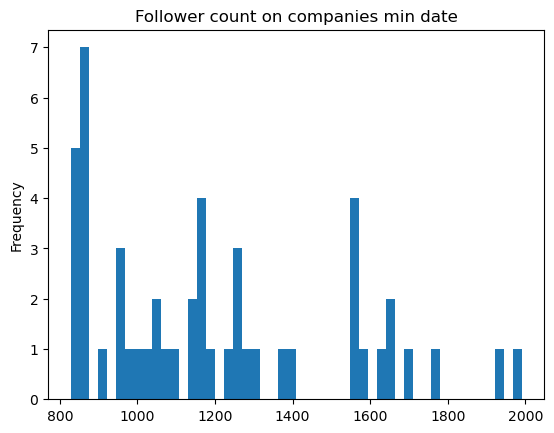

In [140]:


#find the min date for each company and have count of followers
min_date_followers = df_real_wo_all.groupby('business_entity_doing_business_as_name').agg({'period_end_date': 'min', 'followers': 'count'})
#min date in the dataset



#get rid of any company thats min_date_follwers date is larger than'2015-01-03'
min_date_followers_after = min_date_followers[min_date_followers['period_end_date'] > min_date_followers['period_end_date'].min()]
m=min_date_followers_after.nlargest(50, 'followers')
m['followers'].plot(kind='hist', bins=50, title='Follower count on companies min date')

#for each company in m find the companys followers count each week for the first 4 weeks




In [155]:
import pandas as pd

# Filter the DataFrame to include only the rows where the period is "Weekly"
df_filtered = df_real_wo_all[df_real_wo_all['period'] == 'Weekly']

# Sort the DataFrame by the "period_end_date" column in ascending order
df_sorted = df_filtered.sort_values('period_end_date')
df_sorted

# Group the DataFrame by the "business_entity_doing_business_as_name" column
#grouped_df = df_sorted.groupby('business_entity_doing_business_as_name')

# Calculate the change in followers from the first week to the second week
#df_sorted['follower_change'] = grouped_df['followers'].diff()

# Calculate the average change in follower count for a while after the third week
#df_sorted['average_follower_change'] = grouped_df['follower_change'].rolling(window=3, min_periods=1).mean().shift(-2)

# Compare the change in followers from the first week to the second week with the average change in follower count for a while after the third week
#df_sorted['follower_spike'] = df_sorted['follower_change'] > df_sorted['average_follower_change']

# Print the resulting DataFrame
#print(df_sorted[['business_entity_doing_business_as_name', 'period_end_date', 'follower_change', 'average_follower_change', 'follower_spike']])


,period,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,calculation_type,followers,pictures,videos,comments,likes
191562,Weekly,2015-01-03,Luxury & Premium & Mainstream,Premium Brands,Kenzo,LVMH Moet Hennessy Louis Vuitton SE,France,LVMH Moet Hennessy Louis Vuitton SE,Euronext Paris,Metric Value,822993.0,NaN,NaN,NaN,NaN
62227,Weekly,2015-01-03,Beverages,Beverages,BodyArmor,BA Sports Nutrition LLC,NaN,Coca-Cola,NaN,Metric Value,NaN,17.0,NaN,218.0,14012.0
584642,Weekly,2015-01-03,Sportswear & Athleisure,US Softlines Analyst Interest List,Fabletics,Forever 21,NaN,Forever 21,NaN,Metric Value,NaN,37.0,5.0,1420.0,49435.0
96161,Weekly,2015-01-03,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Armani,Armani,NaN,Armani,NaN,Metric Value,1801945.0,57.0,2.0,4669.0,549847.0
258788,Weekly,2015-01-03,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Balmain,Balmain SA,NaN,Balmain SA,NaN,Metric Value,1134343.0,75.0,NaN,11744.0,1061520.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641074,Weekly,2023-09-16,Home Appliances,Home Appliances,iRobot,iRobot Corp,United States of America,iRobot Corp,NASDAQ - All Markets,Metric Value,308260.0,98.0,96.0,1797.0,2905.0
625011,Weekly,2023-09-16,Sportswear & Athleisure,US Softlines Analyst Interest List,Vans,VF Corporation,United States of America,VF Corporation,New York Stock Exchange,Metric Value,33514333.0,325.0,126.0,8684.0,1193629.0
323843,Weekly,2023-09-16,Apparel Retail,Apparel Retail,YOOX,Richemont,Switzerland,Richemont,Six Swiss Exchange,Metric Value,751610.0,18.0,9.0,270.0,3692.0
131981,Weekly,2023-09-16,Apparel Retail,Omnichannel Apparel Retail,Primark,Primark,NaN,Garfield Weston Foundation,NaN,Metric Value,13485863.0,99.0,79.0,13833.0,1075701.0


In [1]:
csv_filepath= r"C:\Users\samut\OneDrive\Desktop\DATATHON 2024\API_SI.POV.GINI_DS2_en_csv_v2_213326.csv"
df_Gini = pd.read_csv(csv_filepath, skiprows=4) 
df_Gini.head()

#find the unique country vaues in the read data set in domicile_country_name
#drop nan values
df_real['domicile_country_name'] = df_real['domicile_country_name'].replace('United States of America', 'United States')
df_real['domicile_country_name'] = df_real['domicile_country_name'].replace('Hong Kong', 'Hong Kong SAR, China')
df_real['domicile_country_name'] = df_real['domicile_country_name'].replace('ChinaHong Kong', 'Hong Kong SAR, China')
df_real['domicile_country_name'] = df_real['domicile_country_name'].replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom')


df_real.dropna(subset=['domicile_country_name'], inplace=True)

#reduce the size of the data set df_Gini to only the countrys in the df_real data set
df_Gini = df_Gini[df_Gini['Country Name'].isin(df_real['domicile_country_name'].unique())]

#if a country has all nan value in 2014-2023 column drop the row
df_Gini.dropna(subset=['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'], how='all', inplace=True)


#get rid of coulmns from 1960-2013 and column
#get rid of column 68
df_Gini.drop(df_Gini.columns[67:69], axis=1, inplace=True)
df_Gini.drop(df_Gini.iloc[:, 1:54], inplace = True, axis = 1)


df_Gini = df_Gini.melt(id_vars=['Country Name'], var_name='Year', value_name='Value')



csv_filepath = r"C:\Users\samut\OneDrive\Desktop\DATATHON 2024\dd151786-ed16-4d7b-b709-28e9c364f436_Data.csv"
df_GDP = pd.read_csv(csv_filepath)
#make a list
get_rid_of=('Adolescent fertility rate (births per 1,000 women ages 15-19)',
            'Births attended by skilled health staff (% of total)',
            'CO2 emissions (metric tons per capita)',
            'Contraceptive prevalence, any method (% of married women ages 15-49)',
            'Domestic credit provided by financial sector (% of GDP)',
            'Electric power consumption (kWh per capita)',
            'Energy use (kg of oil equivalent per capita)',
            'Exports of goods and services (% of GDP)',
            'External debt stocks, total (DOD, current US$)',
            'Fertility rate, total (births per woman)',
            'Foreign direct investment, net inflows (BoP, current US$)',
            'Forest area (sq. km)','Agriculture, forestry, and fishing, value added (% of GDP)',
       'Annual freshwater withdrawals, total (% of internal resources)','High-technology exports (% of manufactured exports)',
       'Immunization, measles (% of children ages 12-23 months)',
       'Imports of goods and services (% of GDP)','Industry (including construction), value added (% of GDP)',
       'Inflation, GDP deflator (annual %)',
       'Life expectancy at birth, total (years)',
       'Merchandise trade (% of GDP)', 'Military expenditure (% of GDP)',
       'Mobile cellular subscriptions (per 100 people)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Net barter terms of trade index (2015 = 100)', 'Net migration',
       'Net official development assistance and official aid received (current US$)',
       'Personal remittances, received (current US$)',
       'Population density (people per sq. km of land area)',
       'Population growth (annual %)', 'Population, total',
       'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)','Poverty headcount ratio at national poverty lines (% of population)',
       'Prevalence of HIV, total (% of population ages 15-49)',
       'Prevalence of underweight, weight for age (% of children under 5)',
       'Primary completion rate, total (% of relevant age group)',
       'Revenue, excluding grants (% of GDP)',
       'School enrollment, primary (% gross)',
       'School enrollment, primary and secondary (gross), gender parity index (GPI)',
       'School enrollment, secondary (% gross)',
       'Statistical Capacity Score (Overall Average) (scale 0 - 100)',
       'Surface area (sq. km)', 'Tax revenue (% of GDP)',
       'Terrestrial and marine protected areas (% of total territorial area)',
       'Time required to start a business (days)',
       'Total debt service (% of exports of goods, services and primary income)',
       'Urban population growth (annual %)',
            'GNI per capita, Atlas method (current US$)',
       'GNI per capita, PPP (current international $)',
       'GNI, Atlas method (current US$)',
       'GNI, PPP (current international $)',
       'Gross capital formation (% of GDP)','Income share held by lowest 20%','GDP growth (annual %)')
#in Series Name column get rid of the values in get_rid_of
df_GDP = df_GDP[~df_GDP['Series Name'].isin(get_rid_of)]
#drop Series Code and Country Code
df_GDP.drop(columns=['Series Code', 'Country Code','Series Name'], inplace=True)
#drop rows 1045 to 1049
df_GDP.drop(df_GDP.index[1045:1050], inplace=True)

#can you melt the tabel togather and get each 
df_GDP = df_GDP.melt(id_vars=['Country Name'], var_name='Year', value_name='Value')



#in year column get rid of anyhing past the first 4 letters
df_Gini['Year'] = df_Gini['Year'].str[:4]
df_GDP['Year'] = df_GDP['Year'].str[:4]

#get rid of the years befor 2014 in df_Gini
df_Gini = df_Gini[df_Gini['Year'] >= '2014']

#merge the two data sets df_GDP and df_Gini based on country name and year
df_GDP_Gini = pd.merge(df_GDP, df_Gini, on=['Country Name', 'Year'], how='inner', suffixes=('GDP', 'Gini'))
df_GDP_Gini

NameError: name 'pd' is not defined